**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression Theory

Logistic regression is a statistical method used to analyze a dataset with one or more independent vaariables that determine an outcome.

The outcome is measured with a binary variable (there are only two possible outcomes)

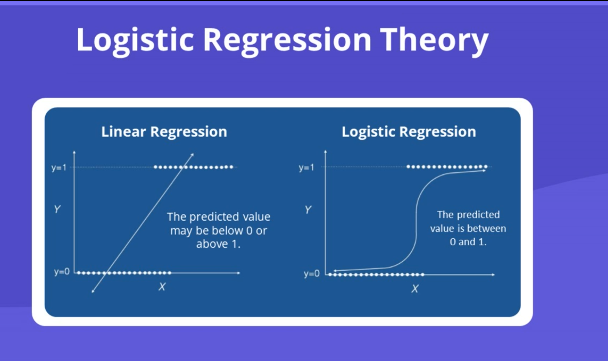

In machine learning and pattern recognition, a `feature` is an individual measurable property or characteristic of a phenomenon.

**Loading the Dataset**

Titanic sank on its maiden voyage on April 15, 1912, after colliding with an iceberg. 2224 passengers and 1502 crew members actually lost their lives.

this tragic disaster shocked the interntional community and led to better safety arrangements for ships.

One of the reasons the accident caused such loss of life was the lack of life was the lack of lifeboats for passengers and crew.

In [3]:
df = sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* **mpg** = **Miles-Per-Gallon**(British measure of fuel consumption. Indicates how many miles the vehicle has traveled on 1 gallon of petrol/diesel.)
* **cylinders** = Number of **cylinders** in the **engine** (The back and forth movement of the pistons in the cylinders creates the energy that makes the engine work.)
* **displacement** = **Engine displacement** is the swept volume of all the pistons inside the cylinders of a reciprocating engine in a single movement from top dead centre (TDC) to bottom dead centre (BDC).
* **horsepower** = It is the most important key that provides information about the performance of a motor vehicle.
* **weight** = Vehicle's weight
* **acceleration** = Vehicle's acceleration
* **model_year** = Model of the vehicle
* **origin** = Vehicle's origin
* **name** = Vehicle's name

**Initial Analysis on the Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.drop(["embarked", "class", "alive"], axis = 1, inplace = True)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


In [8]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who',
       'adult_male', 'deck', 'embark_town', 'alone'],
      dtype='object')

**Exploratory Data Analysis(EDA)**

In [9]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

In [10]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [11]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

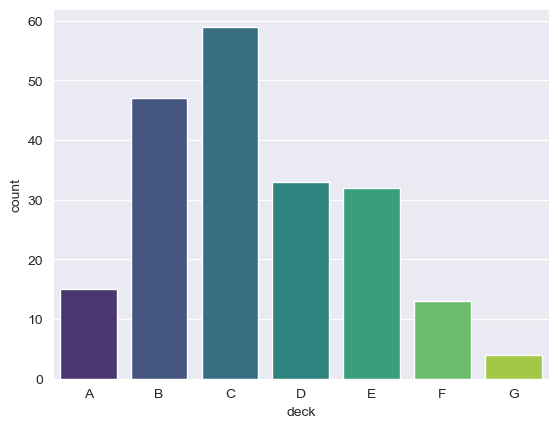

In [12]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, palette = "viridis")

<Axes: xlabel='deck', ylabel='count'>

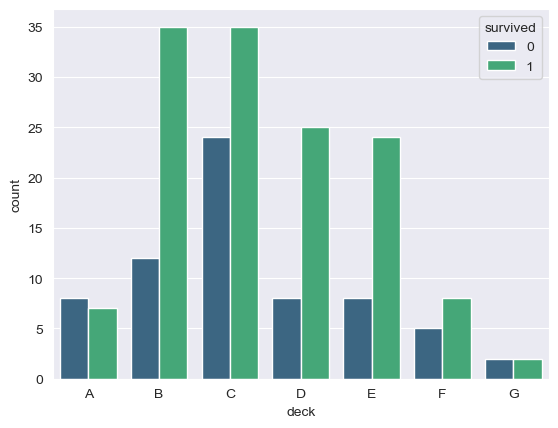

In [13]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", hue = "survived", data = df, palette = "viridis")

In [14]:
df.drop(["deck"], axis = 1, inplace = True)

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: xlabel='pclass', ylabel='age'>

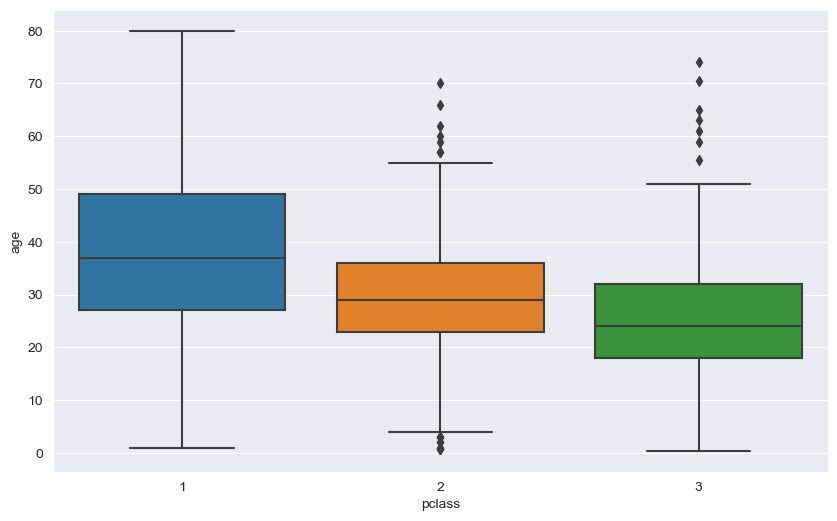

In [16]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "pclass", y = "age", data = df)

In [17]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age

In [18]:
df.age = df[["age", "pclass"]].apply(fillna_age, axis = 1)  

In [19]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [20]:
df.dropna(inplace = True)

In [21]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


<Axes: xlabel='survived', ylabel='count'>

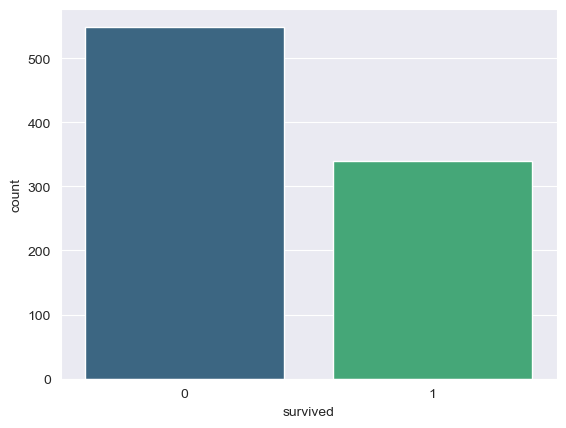

In [22]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", data = df, palette = "viridis")

In [23]:
df.survived.value_counts()

0    549
1    340
Name: survived, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

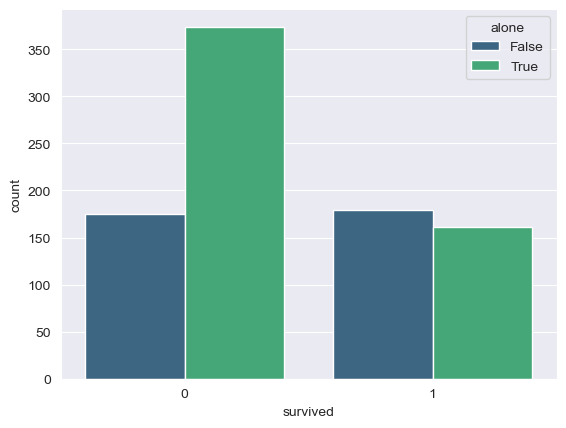

In [24]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "alone", data = df, palette = "viridis")

<Axes: xlabel='survived', ylabel='count'>

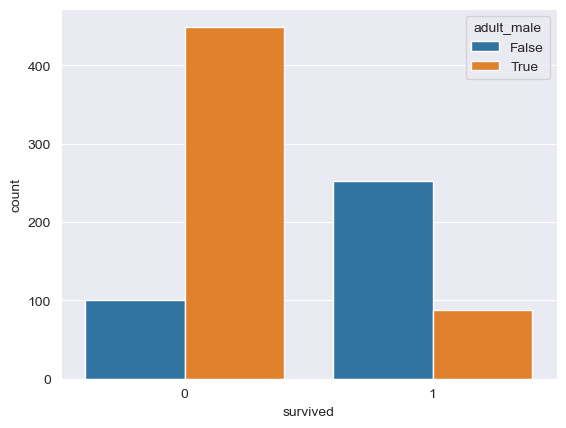

In [25]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "adult_male", data = df)

<Axes: xlabel='survived', ylabel='count'>

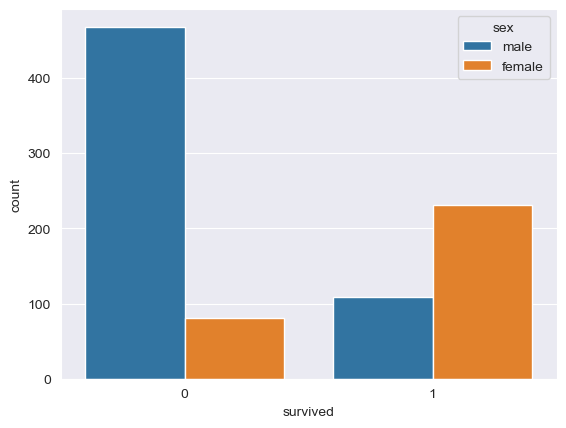

In [26]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "sex", data = df)

<Axes: xlabel='survived', ylabel='count'>

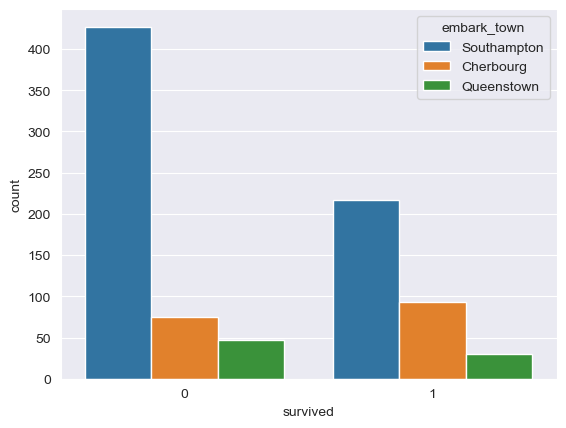

In [27]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "embark_town", data = df)

In [28]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

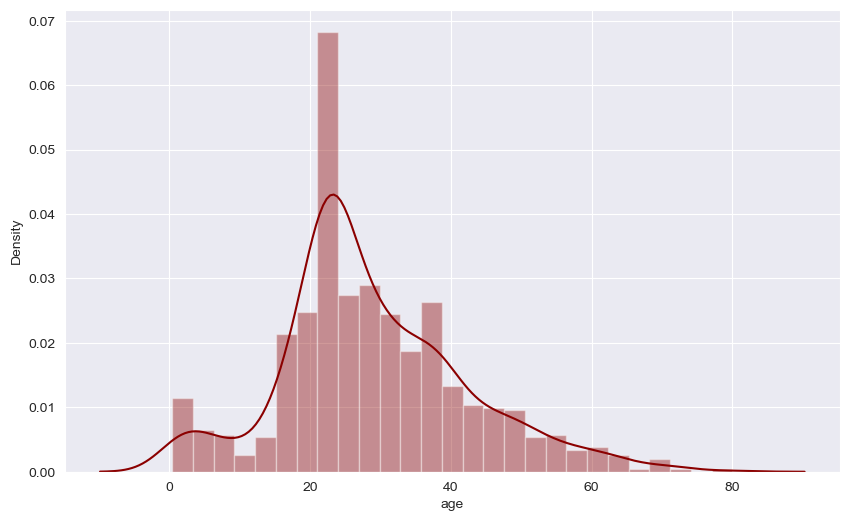

In [29]:
plt.figure(figsize = (10, 6))
sns.distplot(df["age"], color = "darkred")

<Axes: xlabel='fare', ylabel='Density'>

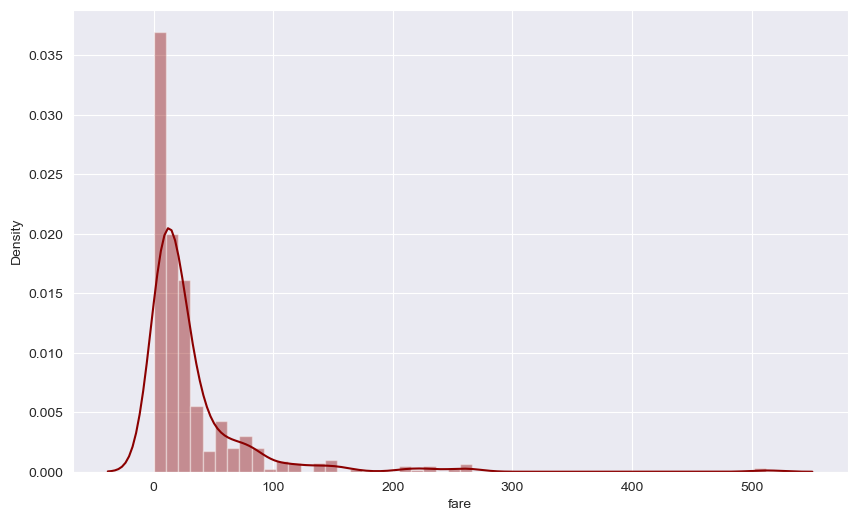

In [30]:
plt.figure(figsize = (10, 6))
sns.distplot(df["fare"], color = "darkred")

<Axes: >

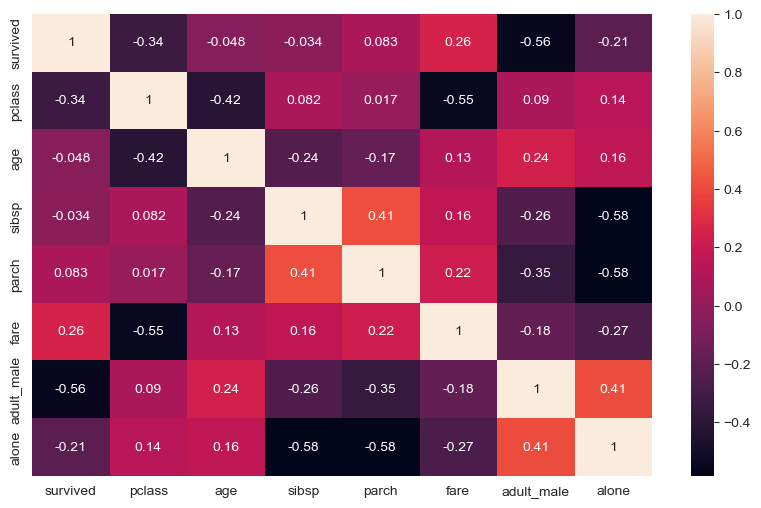

In [31]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

In [32]:
df.drop(["age", "sibsp", "parch"], axis = 1, inplace = True)

In [33]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


In [34]:
sex = pd.get_dummies(df["sex"], drop_first = True)
who = pd.get_dummies(df["who"], drop_first = True)
adult_male = pd.get_dummies(df["adult_male"], drop_first = True)
embark_town = pd.get_dummies(df["embark_town"], drop_first = True)
alone = pd.get_dummies(df["alone"], drop_first = True)

In [35]:
df = pd.concat([df, sex, who, adult_male, embark_town, alone], axis = 1)

In [36]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,True,Queenstown,Southampton,True
0,0,3,male,7.2500,man,True,Southampton,False,1,1,0,1,0,1,0
1,1,1,female,71.2833,woman,False,Cherbourg,False,0,0,1,0,0,0,0
2,1,3,female,7.9250,woman,False,Southampton,True,0,0,1,0,0,1,1
3,1,1,female,53.1000,woman,False,Southampton,False,0,0,1,0,0,1,0
4,0,3,male,8.0500,man,True,Southampton,True,1,1,0,1,0,1,1


In [37]:
df.drop(["sex", "who", "adult_male", "embark_town", "alone"], axis = 1, inplace = True)

In [38]:
df.head()

,survived,pclass,fare,male,man,woman,True,Queenstown,Southampton,True
0,0,3,7.2500,1,1,0,1,0,1,0
1,1,1,71.2833,0,0,1,0,0,0,0
2,1,3,7.9250,0,0,1,0,0,1,1
3,1,1,53.1000,0,0,1,0,0,1,0
4,0,3,8.0500,1,1,0,1,0,1,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   fare         889 non-null    float64
 3   male         889 non-null    uint8  
 4   man          889 non-null    uint8  
 5   woman        889 non-null    uint8  
 6   True         889 non-null    uint8  
 7   Queenstown   889 non-null    uint8  
 8   Southampton  889 non-null    uint8  
 9   True         889 non-null    uint8  
dtypes: float64(1), int64(2), uint8(7)
memory usage: 33.9 KB


**Modelling**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop("survived", axis = 1)
y = df["survived"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 376 to 103
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       666 non-null    int64  
 1   fare         666 non-null    float64
 2   male         666 non-null    uint8  
 3   man          666 non-null    uint8  
 4   woman        666 non-null    uint8  
 5   True         666 non-null    uint8  
 6   Queenstown   666 non-null    uint8  
 7   Southampton  666 non-null    uint8  
 8   True         666 non-null    uint8  
dtypes: float64(1), int64(1), uint8(7)
memory usage: 20.2 KB


In [58]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 666 entries, 376 to 103
Series name: survived
Non-Null Count  Dtype
--------------  -----
666 non-null    int64
dtypes: int64(1)
memory usage: 10.4 KB


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr_model = LogisticRegression()

In [51]:
lr_model.fit(X_train, y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['bool', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [61]:
y_pred = lr_model.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [63]:
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [64]:
cnf_matrix = confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [65]:
cnf_matrix

NameError: name 'cnf_matrix' is not defined

**Thanks**